In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

./__output__.json
./__notebook__.ipynb


# Loading Data

In [2]:
train_data = pd.read_csv("../input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv('../input/titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA

In [4]:
train_data.shape

(891, 12)

In [5]:
test_data.shape

(418, 11)

1. Check the data types of each feature for inconsistencies

In [6]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

2. Check the data for missing values

In [8]:
print("Missing data counts in Training Data : ")
print(train_data.isnull().sum())

print("Missing data counts in Test Data : ")
print(test_data.isnull().sum())


Missing data counts in Training Data : 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing data counts in Test Data : 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
print("Percentage of data missing Training Data: ")
print(train_data.isnull().sum()/train_data.shape[0])

print("Percentage of data missing Test Data: ")
print(test_data.isnull().sum()/test_data.shape[0])

Percentage of data missing Training Data: 
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64
Percentage of data missing Test Data: 
PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64


## Observation: 

#### Train Data:
* About 77% data is missing from the 'Cabin' column. We can drop that column.
* Only two data points are missing from 'Embarked'
* Age has about 20% missing data. 

#### Test Data:
* 1 missing data point in Fare 
* About 20% missing data in Age
* 78 % missing data in Cabin.

We can safely remove the column Cabin from both Train and Test Data

In [10]:
columns_to_drop = []
columns_to_drop.append('Cabin')

# Data Cleaning

1. Let us check if we can predict the missing Fare Price from the test data

In [11]:
test_data[test_data['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


## Observations:
We can see that the **Pclass** is **3** and **Ticket Number** is **3701** and also the **Embarked** is **'S'**.
Let see if we can use this information to guess a **Fare**.

In [12]:
test_data[test_data['Ticket']=='3701']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [13]:
class_3_data = test_data[test_data['Pclass'] == 3]
class_3_S = class_3_data[class_3_data['Embarked'] == 'S']
class_3_S[class_3_S['Age']>40]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
25,917,3,"Robins, Mr. Alexander A",male,50.0,1,0,A/5. 3337,14.5000,NaN,S
42,934,3,"Goldsmith, Mr. Nathan",male,41.0,0,0,SOTON/O.Q. 3101263,7.8500,NaN,S
134,1026,3,"Dintcheff, Mr. Valtcho",male,43.0,0,0,349226,7.8958,NaN,S
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S
228,1120,3,"Everett, Mr. Thomas James",male,40.5,0,0,C.A. 6212,15.1000,NaN,S
309,1201,3,"Hansen, Mrs. Claus Peter (Jennie L Howard)",female,45.0,1,0,350026,14.1083,NaN,S


We can see that all the passengers with similar data points have a Fare of either 7 or 15. Lets set the Fare to 14.

In [14]:
test_data[test_data["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [15]:
test_data.iloc[152,-3]= 14

2. Lets try to predict the ages for the missing age values

In [16]:
train_data[train_data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


### Approach :
We can check the Names of each passenger to understand Title given to each passenger in the data.
Title corresponds to:
   * Master
   * Miss
   * so on...
   

Getting all the titles from the Training data

In [17]:
def extract_titles(df):
    pos = df.columns.get_loc('Name')
    titles = set({})
    for row in df.values:
        title = row[pos].split(',')[1].split('.')[0] + '.'.strip()
        titles.add(title)

    return titles


Adding a new column of titles to the Training Data

In [18]:
def add_titles_to_df(df) :
    titles = extract_titles(df)
    pos = df.columns.get_loc('Name')
    title_list = []
    for row in df.values:
        for title in titles:
            if title in row[pos]:
                title_list.append(title)
                break
    df['Title'] = title_list
    return df
    


In [19]:
train_data = add_titles_to_df(train_data)

In [20]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


We can see the Title column added above

In [21]:
test_data = add_titles_to_df(test_data)

In [22]:
train_data['Title'].value_counts()

 Mr.              517
 Miss.            182
 Mrs.             125
 Master.           40
 Dr.                7
 Rev.               6
 Major.             2
 Col.               2
 Mlle.              2
 Lady.              1
 Capt.              1
 Don.               1
 Ms.                1
 the Countess.      1
 Jonkheer.          1
 Sir.               1
 Mme.               1
Name: Title, dtype: int64

In [23]:
test_data['Title'].value_counts()

 Mr.        240
 Miss.       78
 Mrs.        72
 Master.     21
 Col.         2
 Rev.         2
 Ms.          1
 Dona.        1
 Dr.          1
Name: Title, dtype: int64

**Observation:**

* We can see that there are **Titles** with 1 or 2 entries. 
* We can also see that there is a lot of inconsitencies in the titles between train and test set.

Lets combine these titles with the common titles like Mr, Miss, Mrs, Master

In [24]:
male_titles = [' Col.',' Major.',' Capt.',' Jonkheer.',' Don.',' Sir.']
female_titles = [' Lady.',' Mme.',' the Countess.',' Dona.',' Mlle.']

In [25]:
def replace_uncommon_titles(df,new_title,title_list):
    pos = df.columns.get_loc('Title')
    for title in title_list:
        for i in range(0,df.shape[0]):
            if df.iloc[i,pos] == title:
                print(title)
                df.iloc[i,pos] = new_title
                
    return df
train_data = replace_uncommon_titles(train_data,' Mr.',male_titles)
train_data = replace_uncommon_titles(train_data," Miss.",female_titles)
test_data = replace_uncommon_titles(test_data," Mr.",male_titles)
test_data = replace_uncommon_titles(test_data," Miss.",female_titles)

 Col.
 Col.
 Major.
 Major.
 Capt.
 Jonkheer.
 Don.
 Sir.
 Lady.
 Mme.
 the Countess.
 Mlle.
 Mlle.
 Col.
 Col.
 Dona.


Now lets check the Age statistics for each title

In [26]:
titles = list(train_data['Title'].value_counts().index)
for title in titles:
    print("Title train:: ",title)
    print(train_data[train_data['Title'] == title].describe()["Age"])
    print("Title test:: ",title)
    print(test_data[test_data['Title'] == title].describe()["Age"])
    

Title train::   Mr.
count    406.000000
mean      32.740148
std       12.930425
min       11.000000
25%       23.000000
50%       30.000000
75%       39.750000
max       80.000000
Name: Age, dtype: float64
Title test::   Mr.
count    185.000000
mean      32.194595
std       11.891720
min       14.000000
25%       23.000000
50%       29.000000
75%       40.000000
max       67.000000
Name: Age, dtype: float64
Title train::   Miss.
count    151.000000
mean      22.066225
std       12.983121
min        0.750000
25%       14.750000
50%       22.000000
75%       30.000000
max       63.000000
Name: Age, dtype: float64
Title test::   Miss.
count    65.000000
mean     22.039846
std      10.593381
min       0.170000
25%      18.000000
50%      22.000000
75%      30.000000
max      45.000000
Name: Age, dtype: float64
Title train::   Mrs.
count    108.000000
mean      35.898148
std       11.433628
min       14.000000
25%       27.750000
50%       35.000000
75%       44.000000
max       63.000000
N

## Use Titles to approximate the ages

### Approach: 
* By intuition, the titles do signify some sort of age. For example, Master. is for boys under a certain age. 
* So the approach is to group the data by titles and assign the mean age to the corresponding entries

In [27]:
age_mean = train_data.groupby("Title").mean()['Age']

Mean ages by group

In [28]:
age_mean

Title
 Dr.        42.000000
 Master.     4.574167
 Miss.      22.066225
 Mr.        32.740148
 Mrs.       35.898148
 Ms.        28.000000
 Rev.       43.166667
Name: Age, dtype: float64

In [29]:
def fill_age_na(df,age_mean):
    rows_with_age_missing = df[df['Age'].isnull()]
    pos = df.columns.get_loc("Age")
    for title in age_mean.index:
        passengerIds = rows_with_age_missing[rows_with_age_missing['Title'] == title]["PassengerId"]
        for Id in passengerIds:
            df.iloc[df[df['PassengerId'] == Id].index.values,pos] = age_mean[title]
    return df

In [30]:
train_data = fill_age_na(train_data,age_mean)
test_data = fill_age_na(test_data,age_mean)

train_data[train_data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [31]:
test_data[test_data['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [32]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [33]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

### Final touches

Now that we have filled the age fields, we can move on to the other columns
1. In the Embarked Column, we can see that there are only two missing data points. We can fill those with the mode of the data, i.e. 'S'.

In [34]:
# Filling Embarked with mode 'S'
train_data['Embarked']= train_data['Embarked'].fillna(value='S',axis=0)

Adding all the columns to be dropped to the list

In [35]:
columns_to_drop.extend(["Ticket"])

In [36]:
def drop_columns(df,list_of_columns):
    return df.drop(list_of_columns,axis=1)
    

In [37]:
train_data = drop_columns(train_data,columns_to_drop)
test_data = drop_columns(test_data,columns_to_drop)

# Extracting labels


In [38]:
labels = train_data['Survived']
train_data = train_data.drop('Survived',axis=1)

In [39]:
cleaned_train_data = train_data
cleaned_test_data = test_data

# Preprocessing Data

In [40]:
categorical_columns = ['Pclass','Sex','Embarked','Title']
numerical_columns = ['Age','Fare','SibSp','Parch']


In [41]:
from sklearn.preprocessing import StandardScaler

def preprocess_data(df):
    scaler = StandardScaler()

    # split data into numerical and categorical
    numerical_data = df[numerical_columns]
    categorical_data = df[categorical_columns]

    #scaling the data with StandardScaler
    std_data_numerical = scaler.fit_transform(numerical_data)
    df_numerical = pd.DataFrame(std_data_numerical,columns=numerical_columns,index=df.index)


    #handling the categorical data
    std_data_categorical = pd.get_dummies(categorical_data,columns=categorical_columns)

    # combining the numerical and categorical data into one DataFrame
    final_data = df_numerical.join(std_data_categorical,how='inner')
    
    return final_data

In [42]:
preprocessed_train_data = preprocess_data(cleaned_train_data)

In [43]:
preprocessed_test_data = preprocess_data(cleaned_test_data)

In [44]:
preprocessed_test_data.columns

Index(['Age', 'Fare', 'SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Title_ Dr.', 'Title_ Master.', 'Title_ Miss.', 'Title_ Mr.',
       'Title_ Mrs.', 'Title_ Ms.', 'Title_ Rev.'],
      dtype='object')

# Model Selection

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_X, val_X, train_y, val_y = train_test_split(preprocessed_train_data,labels,random_state=1)

## RandomForestClassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
for num in estimators:
    model = RandomForestClassifier(n_estimators=num)
    model.fit(train_X,train_y)
    preds = model.predict(val_X)
    
    print("Accuracy for {} estimators is {}".format(num,accuracy_score(val_y,preds,normalize=True)))

Accuracy for 1 estimators is 0.7354260089686099
Accuracy for 2 estimators is 0.7443946188340808
Accuracy for 4 estimators is 0.7443946188340808
Accuracy for 8 estimators is 0.7443946188340808
Accuracy for 16 estimators is 0.7802690582959642
Accuracy for 32 estimators is 0.7668161434977578
Accuracy for 64 estimators is 0.7533632286995515
Accuracy for 100 estimators is 0.7533632286995515
Accuracy for 200 estimators is 0.757847533632287


## XGBoostClassifier

In [47]:
import xgboost as xgb
n_est = [5,10,20,40,100,200]
for num in n_est:
    xgb_model = xgb.XGBClassifier(n_estimators=num)
    xgb_model.fit(train_X,train_y)
    preds = xgb_model.predict(val_X)

    print("Accuracy lr {} is {}".format(num,accuracy_score(val_y,preds,normalize=True)))

Accuracy lr 5 is 0.8071748878923767
Accuracy lr 10 is 0.8026905829596412
Accuracy lr 20 is 0.8026905829596412
Accuracy lr 40 is 0.7847533632286996
Accuracy lr 100 is 0.7982062780269058
Accuracy lr 200 is 0.7937219730941704


## Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
iters = [50,100,150,200,300,500]
for num in iters:
    model = LogisticRegression(penalty='l2',max_iter=num,random_state=1,verbose=3)
    model.fit(train_X,train_y)
    preds = model.predict(val_X)
    print("Accuracy for {} iterations  is {}".format(num,accuracy_score(val_y,preds,normalize=True)))

[LibLinear]Accuracy for 50 iterations  is 0.8116591928251121
[LibLinear]Accuracy for 100 iterations  is 0.8116591928251121
[LibLinear]Accuracy for 150 iterations  is 0.8116591928251121
[LibLinear]Accuracy for 200 iterations  is 0.8116591928251121
[LibLinear]Accuracy for 300 iterations  is 0.8116591928251121
[LibLinear]Accuracy for 500 iterations  is 0.8116591928251121


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

We get the highest accuracy on the validation with Logistic regression :)

In [49]:
model = LogisticRegression(penalty='l2',solver='lbfgs',random_state=1)
model.fit(preprocessed_train_data,labels)
preds = model.predict(preprocessed_test_data)

In [50]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId,
                      'Survived': preds})
output.to_csv('submission.csv', index=False)

output

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [51]:
from sklearn.manifold import TSNE

def plot_TSNE(data,label):
    
    tsne = TSNE(n_components=2,random_state=0,n_iter=5000,verbose=3,perplexity=30,learning_rate=200)
    embeddings = tsne.fit_transform(data)
    return embeddings
    

In [52]:
embeddings = plot_TSNE(preprocessed_train_data,labels)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 891 samples in 0.006s...
[t-SNE] Computed neighbors for 891 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 891 / 891
[t-SNE] Mean sigma: 0.047104
[t-SNE] Computed conditional probabilities in 0.060s
[t-SNE] Iteration 50: error = 61.9645195, gradient norm = 0.2892923 (50 iterations in 0.494s)
[t-SNE] Iteration 100: error = 58.1792870, gradient norm = 0.2604393 (50 iterations in 0.393s)
[t-SNE] Iteration 150: error = 57.6668243, gradient norm = 0.2470580 (50 iterations in 0.319s)
[t-SNE] Iteration 200: error = 57.6585121, gradient norm = 0.2484675 (50 iterations in 0.301s)
[t-SNE] Iteration 250: error = 57.5247765, gradient norm = 0.2546340 (50 iterations in 0.310s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.524776
[t-SNE] Iteration 300: error = 0.4415490, gradient norm = 0.0006633 (50 iterations in 0.246s)
[t-SNE] Iteration 350: error = 0.3896157, gradient norm = 0.0002756 (

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

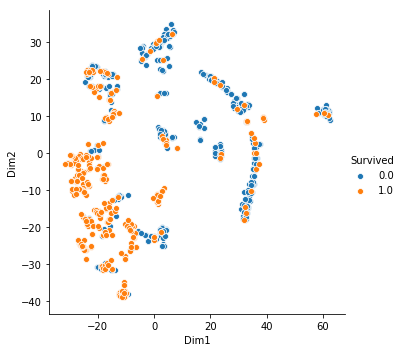

In [54]:
plot_data = np.hstack((embeddings,np.array(labels).reshape(len(labels),1)))
    
plot_df = pd.DataFrame(plot_data,columns=['Dim1','Dim2','Survived'])
    
sns.FacetGrid(plot_df,hue="Survived",height=5).map(sns.scatterplot,"Dim1","Dim2").add_legend()
